<a href="https://colab.research.google.com/github/ibukunlola/capstone/blob/main/model1/synth_contr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# load Synth package
install.packages("Synth")
library(Synth)
library(tibble)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# load data with NA values
data <- read.csv(url("https://raw.githubusercontent.com/ibukunlola/capstone/main/model1/average_df.csv"))

# create unique unit numbers for each country in the dataframe
countries <- unique(data$country_name)
count = 1
for (country in countries){
  indices <- which(data$country_name == country)
  for (index in indices){
    data$X[index] <- count
  }
  count = count+1
}

head(data, n = 10)

,X,country_name,year,fdi,pol_instability,gni,curr_act_bal
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Angola,2010,-3227211182,-0.2261823,5950,7505954235
2,1,Angola,2011,-3023770966,-0.3692378,6130,13084636207
3,1,Angola,2012,-1464627991,-0.3893225,6810,13841185161
4,1,Angola,2013,-7120017424,-0.3912335,7130,8145070112
5,1,Angola,2014,3657514667,-0.3332320,7680,-3747517596
6,1,Angola,2015,10028215163,-0.5008978,6960,-10272841903
7,1,Angola,2016,-179517619,-0.3158988,6730,-3085195463
8,1,Angola,2017,-7397295409,-0.3804490,6860,-632867148
9,1,Angola,2018,-6456076413,-0.3356918,6550,7402606519


In [13]:
# show structure of dataset
str(data)

# summarize dataset
summary(data)

'data.frame':	480 obs. of  7 variables:
 $ X              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ country_name   : chr  "Angola" "Angola" "Angola" "Angola" ...
 $ year           : int  2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 ...
 $ fdi            : num  -3.23e+09 -3.02e+09 -1.46e+09 -7.12e+09 3.66e+09 ...
 $ pol_instability: num  -0.226 -0.369 -0.389 -0.391 -0.333 ...
 $ gni            : num  5950 6130 6810 7130 7680 6960 6730 6860 6550 6370 ...
 $ curr_act_bal   : num  7.51e+09 1.31e+10 1.38e+10 8.15e+09 -3.75e+09 ...


       X         country_name            year           fdi            
 Min.   : 1.00   Length:480         Min.   :2010   Min.   :-7.397e+09  
 1st Qu.:12.75   Class :character   1st Qu.:2012   1st Qu.: 8.809e+07  
 Median :24.50   Mode  :character   Median :2014   Median : 3.579e+08  
 Mean   :24.50                      Mean   :2014   Mean   : 7.747e+08  
 3rd Qu.:36.25                      3rd Qu.:2017   3rd Qu.: 9.599e+08  
 Max.   :48.00                      Max.   :2019   Max.   : 1.003e+10  
 pol_instability         gni         curr_act_bal       
 Min.   :-3.13097   Min.   :  610   Min.   :-2.128e+10  
 1st Qu.:-1.13244   1st Qu.: 1588   1st Qu.:-1.346e+09  
 Median :-0.46042   Median : 2700   Median :-9.549e+08  
 Mean   :-0.59375   Mean   : 4748   Mean   :-1.121e+09  
 3rd Qu.:-0.02507   3rd Qu.: 4962   3rd Qu.:-2.085e+08  
 Max.   : 1.11105   Max.   :27630   Max.   : 1.905e+10  

In [14]:
# run synthetic control model

dataprep.out <- dataprep(data, predictors = c('pol_instability', 'gni', 'curr_act_bal'), predictors.op = "mean", dependent = "fdi",
                         time.variable = 'year', time.predictors.prior = c(2010:2016), unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2017), time.plot = 2010:2019, unit.variable = "X", treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:48, 34)))
synth.out <- synth(dataprep.out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2.526074e+19 

solution.v:
 0.009666798 0.9903332 0 

solution.w:
 0.003414923 0.002713565 0.002679524 0.003332365 0.006088777 0.00254492 0.003795696 0.01114542 0.004815732 0.003067998 0.01422681 0.003385724 0.004867567 0.1145582 0.003865002 0.003630059 0.005901159 0.003078939 0.002853115 0.002872821 0.004163748 0.003459544 0.005195499 0.002781867 0.003202344 0.003302642 0.002782071 0.005407477 0.004277547 0.002898942 0.00286223 0.002613928 0.004245896 0.002891494 0.002775441 0.002974062 0.003181535 0.002895212 0.6088602 0.003386644 0.009324133 0.09767755 0.002967705 0.002938083 0.003817408 0.002638504 0.003640011 



$tab.pred
                      Treated     Synthetic   Sample Mean
pol_instability -2.033000e+00 -2.033000e+00 -5.460000e-01
gni              4.932857e+03  4.932843e+03  4.572781e+03
curr_act_bal     7.249717e+09 -1.457746e+09 -1.284020e+09

$tab.v
                v.weights
pol_instability 0.01     
gni             0.99     
curr_act_bal    0        

$tab.w
   w.weights               unit.names unit.numbers
1      0.003                   Angola            1
2      0.003                    Benin            2
3      0.003                 Botswana            3
4      0.003             Burkina Faso            4
5      0.006                  Burundi            5
6      0.003               Cabo Verde            6
7      0.004                 Cameroon            7
8      0.011 Central African Republic            8
9      0.005                     Chad            9
10     0.003                  Comoros           10
11     0.014         Congo, Dem. Rep.           11
12     0.003              

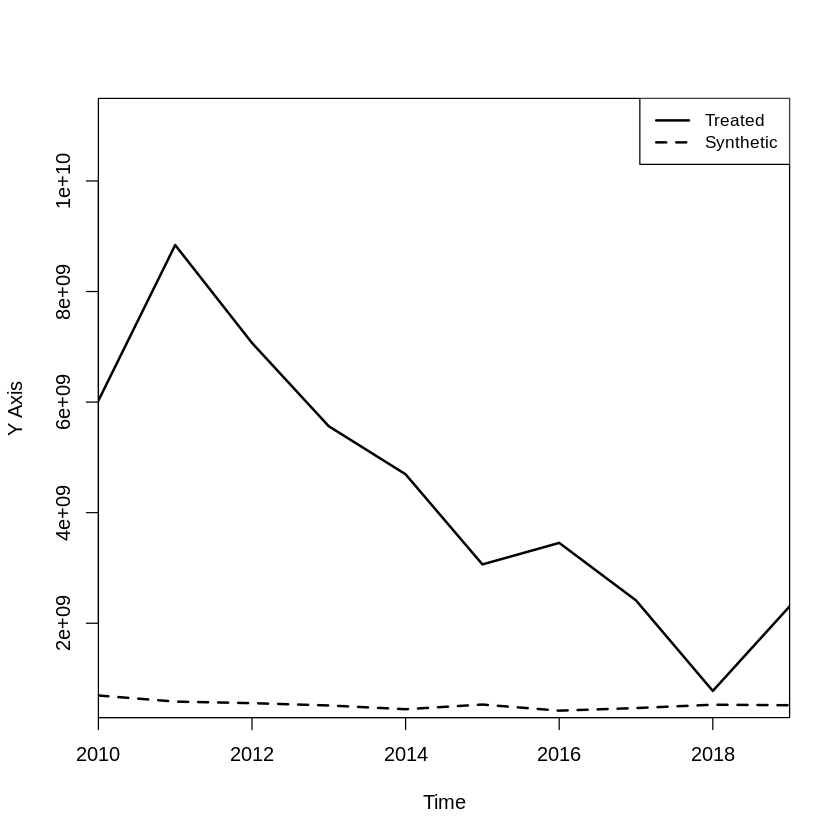

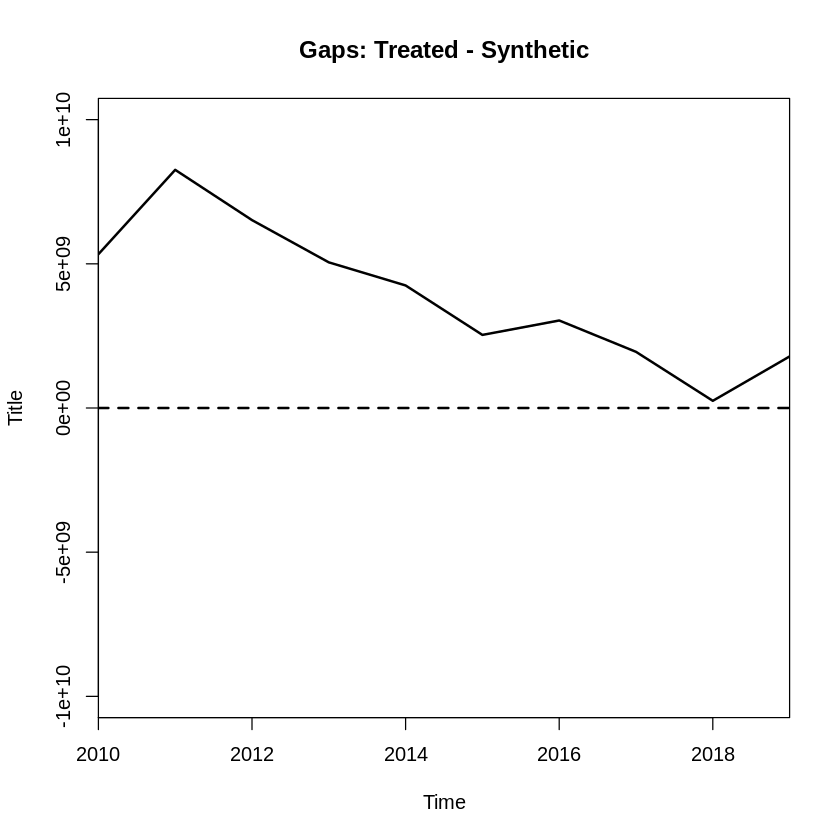

In [15]:
# prepare results tables and graphs
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
print(synth.tables)

path.plot(dataprep.res = dataprep.out,synth.res = synth.out)

gaps.plot(dataprep.res = dataprep.out,synth.res = synth.out)
